<a href="https://colab.research.google.com/github/KILjungjoon/Language-Statistics/blob/main/%EB%91%90_%EC%BB%B4%ED%93%A8%ED%84%B0%EC%9D%98_%EC%84%B1%EB%8A%A5_%EB%B9%84%EA%B5%90_t_test%EC%99%80_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 코드 설명
* 도서관의 컴퓨터로 실행을 했는데 연구실 컴퓨터보다 조금 빠른 것 같습니다.
* 샘플이 각각 3개씩밖에 없지만 어떤 컴퓨터가 더 빠른지, 아니면 차이가 없는지 알아봤습니다.

## 통계 검증하기

In [2]:
import numpy as np
from scipy.stats import ttest_ind

# 데이터
data_A = [(209, 41), (385, 46), (440, 58)]
data_B = [(222, 55), (186, 40), (129, 33)]

# KB당 소요 시간 계산
time_per_kb_A = [time / kb for kb, time in data_A]
time_per_kb_B = [time / kb for kb, time in data_B]

# t-검정 수행
t_statistic, p_value = ttest_ind(time_per_kb_A, time_per_kb_B)

# 평균 KB당 소요 시간 차이 계산
mean_diff = np.mean(time_per_kb_A) - np.mean(time_per_kb_B)

# 결과 출력
if p_value < 0.05:
    print("통계적으로 유의미한 차이가 있습니다.")
    if mean_diff < 0:
        print("A 컴퓨터가 평균적으로 {:.2f}초 더 빠릅니다.".format(abs(mean_diff)))
    else:
        print("B 컴퓨터가 평균적으로 {:.2f}초 더 빠릅니다.".format(abs(mean_diff)))
else:
    print("통계적으로 유의미한 차이가 없습니다.")

통계적으로 유의미한 차이가 있습니다.
A 컴퓨터가 평균적으로 0.09초 더 빠릅니다.


In [7]:
print("A컴퓨터의 실행 속도:", time_per_kb_A)
print("--------- 평균 실행 속도:", np.mean(time_per_kb_A))
print("B컴퓨터의 실행 속도:", time_per_kb_B)
print("--------- 평균 실행 속도:", np.mean(time_per_kb_B))
print("A 컴퓨터가 평균적으로 {:.2f}초 더 빠릅니다.".format(abs(mean_diff)))

A컴퓨터의 실행 속도: [0.19617224880382775, 0.11948051948051948, 0.1318181818181818]
--------- 평균 실행 속도: 0.14915698336750968
B컴퓨터의 실행 속도: [0.24774774774774774, 0.21505376344086022, 0.2558139534883721]
--------- 평균 실행 속도: 0.23953848822566
A 컴퓨터가 평균적으로 0.09초 더 빠릅니다.


In [3]:
# p-value가 0.05보다 작으므로 영가설을 기각하고 두 컴퓨터는 차이가 있다고 볼 수 있다.
p_value

0.028123371074224156

## 시각화하기

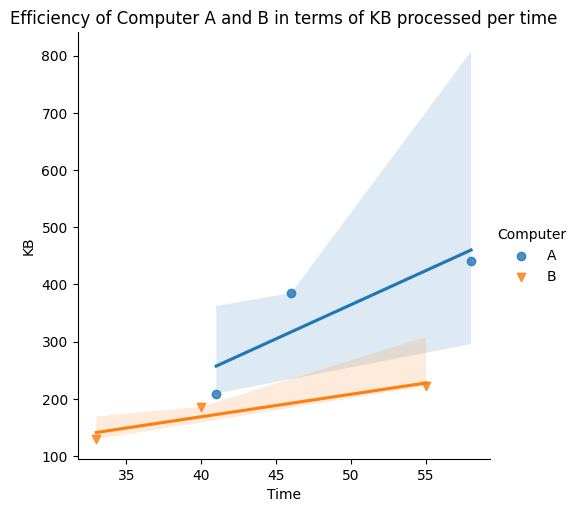

In [13]:
import seaborn as sns
import pandas as pd

# 데이터 정의
data = {
    'Computer': ['A', 'A', 'A', 'B', 'B', 'B'],
    'KB': [209, 385, 440, 222, 186, 129],
    'Time': [41, 46, 58, 55, 40, 33]
}

df = pd.DataFrame(data)

# Seaborn을 이용한 scatter plot과 선형회귀선 그리기
sns.lmplot(x='Time', y='KB', data=df, hue='Computer', markers=['o', 'v'])

plt.title('Efficiency of Computer A and B in terms of KB processed per time')
plt.show()